# Discovery & dot plot of regulation marker TFs
## Load data

In [1]:
import numpy as np
from dictys.net import network
from dictys.plot.static import compute_reg_spec,fig_heatmap_reg_spec
from dictys.plot import dotplot,heatmap
d0=network.from_file('../../data/static.h5')


## An initial plot
Dot plot of regulatory activity for top regulation marker TFs

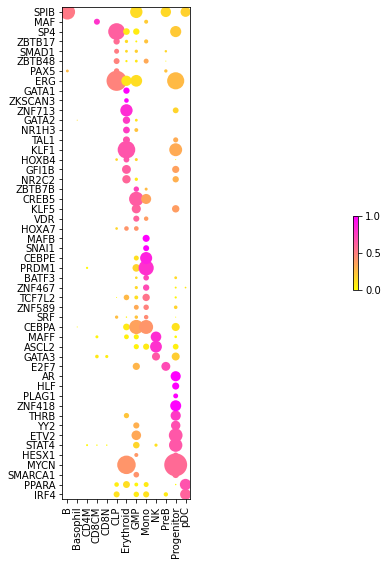

In [2]:
#Color map
cmap='spring_r'
#Compute regulatory activity, expression, and their specificity for TFs
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0)
fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],cmap=cmap)


Dot plot of expression for top regulation marker TFs

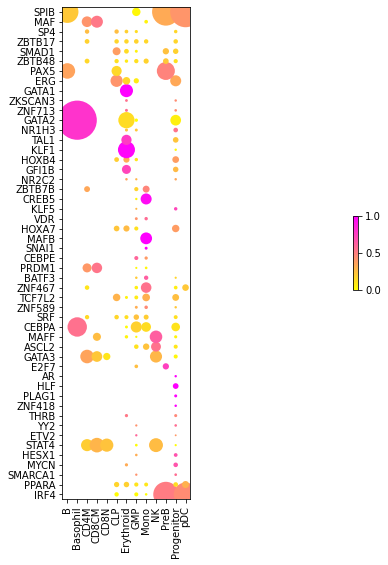

In [3]:
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],cmap=cmap)


## Plot adjustments

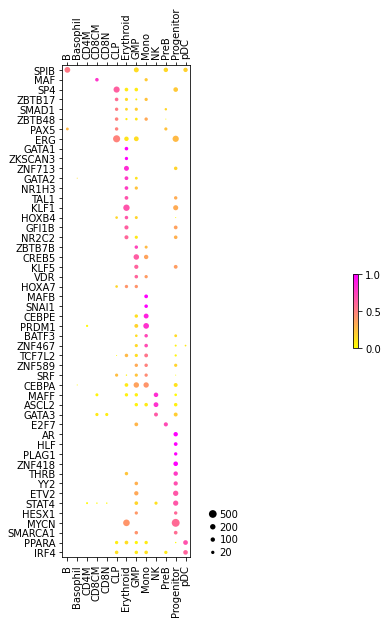

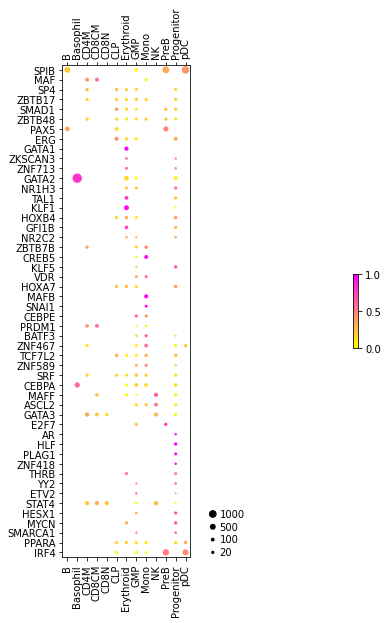

In [4]:
#Node sizes to draw legend in dot plot for regulation
node_size_target=[20,100,200,500]
#Transformation from target count to node size for regulation
node_size_map_target=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)
#Node sizes to draw legend in dot plot for expression (CPM)
node_size_cpm=[20,100,500,1000]
#Transformation from target count to node size for regulation
node_size_map_cpm=lambda x:x*(x<=10)+(10+(x-10)*1000/20/990)*(x>10)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
#Top labels
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Regulation marker discovery adjustments
Cell cluster/type/state names selection & ordering

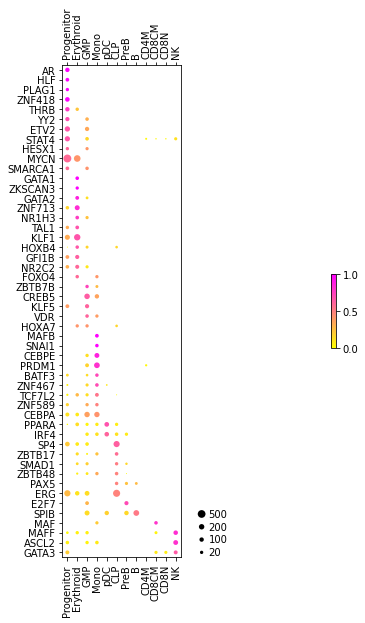

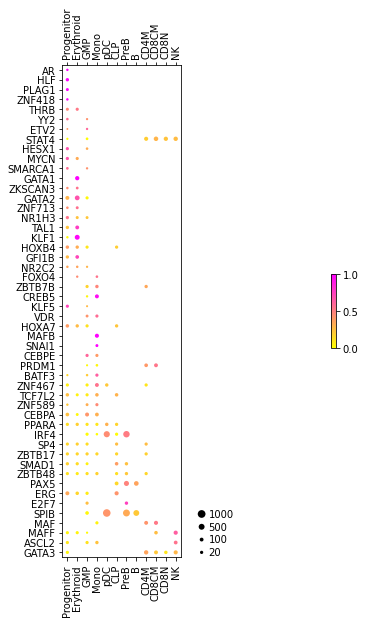

In [5]:
select_state='Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK'.split(',')
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0,select_state=select_state)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


Parameters for regulation marker gene selection: stronger criteria as an example

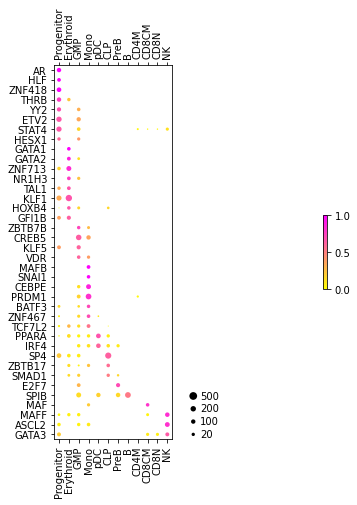

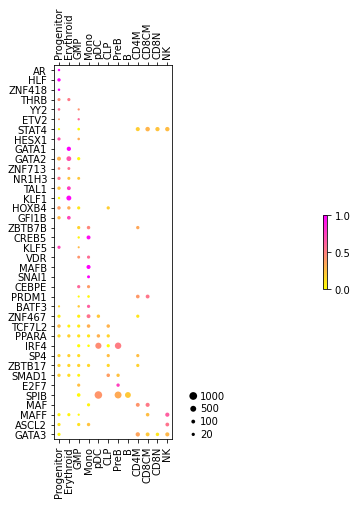

In [6]:
#Specificity entropy level required (relative to random assignment) to select regulator. Lower means more specific.
min_entropy=0.5
#Minimum probability required to be selected
ncut=0.5
#Minimum number of targets required
nmin=25
#Number of top regulation marker TFs to discover for each state
nmax_reg=8
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0,select_state=select_state,min_entropy=min_entropy,ncut=ncut,nmin=nmin,nmax_reg=nmax_reg)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Data inspection

In [7]:
#Regulatory activity (target count)
n.head()

Progenitor  Erythroid  GMP  Mono  pDC  CLP  PreB  B  CD4M  CD8CM  \
AHR             91        162   94   242    0  105     0  0    22      0   
AR              36          0    0     0    0    0     0  0     0      0   
ARID3A           3         11   18     1    9    7     3  0     0      0   
ARID5B           7          8    4     0    0    1     2  2     0      0   
ARNT            59        124   36    33    0   96   194  0     0      0   

        CD8N  NK  
AHR        0   0  
AR         0   0  
ARID3A     0   0  
ARID5B     0   0  
ARNT       0   0

In [8]:
#Regulation cell-type specificity (normalized proportion of targets from each cell type)
v.head()

Progenitor  Erythroid       GMP      Mono       pDC       CLP  \
AHR       0.108488   0.212379  0.118086  0.358825  0.000000  0.160624   
AR        1.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
ARID3A    0.044087   0.177763  0.278738  0.018278  0.275893  0.131999   
ARID5B    0.235485   0.295944  0.141793  0.000000  0.000000  0.043166   
ARNT      0.081966   0.189434  0.052701  0.057019  0.000000  0.171133   

            PreB         B      CD4M  CD8CM  CD8N   NK  
AHR     0.000000  0.000000  0.041599    0.0   0.0  0.0  
AR      0.000000  0.000000  0.000000    0.0   0.0  0.0  
ARID3A  0.073242  0.000000  0.000000    0.0   0.0  0.0  
ARID5B  0.111775  0.171837  0.000000    0.0   0.0  0.0  
ARNT    0.447747  0.000000  0.000000    0.0   0.0  0.0

In [9]:
#Expression (CPM)
cpm.head()

Progenitor  Erythroid        GMP       Mono         pDC         CLP  \
AHR      30.310473  23.399135  51.355968  68.701162   20.277165   17.707938   
AR        6.020573   0.316205   2.274711   0.000000   10.734970    1.344907   
ARID3A   35.985036  28.563810  54.155612  84.174396  299.982764   23.984170   
ARID5B   52.801120  24.453151  12.510909   5.694150   11.927744  115.213674   
ARNT     21.660224  24.558552  33.595727  41.839626   17.295229   16.587183   

             PreB           B        CD4M       CD8CM       CD8N         NK  
AHR      5.155182    6.116994   29.874362   17.192640  18.130345  13.177203  
AR       0.000000    0.000000    0.702926    0.000000   0.000000   1.197928  
ARID3A  60.573385   39.323530   16.870228   11.902597   9.400920  21.562697  
ARID5B  75.609332  207.103927  219.312967  114.397183  34.246207  64.688090  
ARNT    21.479924   21.846406   14.409987   15.870129  16.787357  13.177203

In [10]:
#Expression cell-type specificity (proportion of CPM from each cell type)
cpm_v.head()

Progenitor  Erythroid       GMP      Mono       pDC       CLP  \
AHR       0.100566   0.077635  0.170392  0.227941  0.067277  0.058753   
AR        0.266489   0.013996  0.100686  0.000000  0.475162  0.059530   
ARID3A    0.052420   0.041609  0.078889  0.122618  0.436987  0.034938   
ARID5B    0.056294   0.026071  0.013338  0.006071  0.012717  0.122835   
ARNT      0.083595   0.094781  0.129659  0.161476  0.066749  0.064017   

            PreB         B      CD4M     CD8CM      CD8N        NK  
AHR     0.017104  0.020295  0.099119  0.057043  0.060154  0.043720  
AR      0.000000  0.000000  0.031114  0.000000  0.000000  0.053024  
ARID3A  0.088238  0.057283  0.024575  0.017339  0.013694  0.031411  
ARID5B  0.080611  0.220803  0.233819  0.121964  0.036511  0.068967  
ARNT    0.082900  0.084314  0.055614  0.061249  0.064789  0.050856

In [11]:
#Regulation markers discovered
reg

array(['AR', 'HLF', 'PLAG1', 'ZNF418', 'SMARCA1', 'KLF5', 'GATA1',
       'ZNF713', 'KLF1', 'GATA2', 'FOXO4', 'GFI1B', 'TAL1', 'THRB',
       'ZBTB7B', 'ETV2', 'YY2', 'MAFB', 'RARG', 'SNAI1', 'CEBPE', 'PRDM1',
       'ATF3', 'BATF3', 'ZNF467', 'IRF4', 'PPARA', 'EGR1', 'ZNF816',
       'ZNF282', 'SP4', 'GFI1', 'E2F7', 'SPIB', 'MAF', 'ASCL2', 'GATA3',
       'MAFF'], dtype='<U12')

In [12]:
#Corresponding cell cluster/type/state name of each regulation marker
reg_s

array(['Progenitor', 'Progenitor', 'Progenitor', 'Progenitor',
       'Progenitor', 'Progenitor', 'Erythroid', 'Erythroid', 'Erythroid',
       'Erythroid', 'Erythroid', 'Erythroid', 'Erythroid', 'Erythroid',
       'GMP', 'GMP', 'GMP', 'Mono', 'Mono', 'Mono', 'Mono', 'Mono',
       'Mono', 'Mono', 'Mono', 'pDC', 'pDC', 'pDC', 'CLP', 'CLP', 'CLP',
       'PreB', 'PreB', 'B', 'CD8CM', 'NK', 'NK', 'NK'], dtype='<U10')